In [1]:
from google.cloud import bigquery
from google.colab import auth
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
auth.authenticate_user()

In [3]:
client = bigquery.Client(project='nft-dashboard-381202')

In [4]:
Query = f"""
    SELECT *
    FROM `nft-dashboard-381202.nfts_pipeline.nfts_pipeline_collection_Cryptopunks`
    UNION ALL
    SELECT *
    FROM `nft-dashboard-381202.nfts_pipeline.nfts_pipeline_collection_Mutant_Alien_Ape_Yacht_Club`
    UNION ALL
    SELECT *
    FROM `nft-dashboard-381202.nfts_pipeline.nfts_pipeline_collection_Perky_Platypus`
    UNION ALL
    SELECT *
    FROM `nft-dashboard-381202.nfts_pipeline.nfts_pipeline_collection_Pudgy_Penguins`
    ORDER BY price
"""
nft_data = client.query(Query).to_dataframe()


In [6]:
nft_data.head()

,collection_address,marketplace,token_id,seller,buyer,price_currency,price,protocol_fee_currency,protocol_fee,transaction_hash,block_number
0,0xc4df6018f90f91bad7e24f89279305715b3a276f,wyvern,6626,0xd92584b6c8ec20bf442dd6a7c8ec31ae00a5a94f,0x47506f6a1781158d173cd9c59e26de9c273287c0,ETH,0E-9,ETH,0.0,0xdcc14881126cc234124c65272cff271b1636d2689560...,14330198
1,0xc4df6018f90f91bad7e24f89279305715b3a276f,wyvern,6630,0xd92584b6c8ec20bf442dd6a7c8ec31ae00a5a94f,0x47506f6a1781158d173cd9c59e26de9c273287c0,ETH,0E-9,ETH,0.0,0xdcc14881126cc234124c65272cff271b1636d2689560...,14330198
2,0xc4df6018f90f91bad7e24f89279305715b3a276f,wyvern,6405,0xd92584b6c8ec20bf442dd6a7c8ec31ae00a5a94f,0x47506f6a1781158d173cd9c59e26de9c273287c0,ETH,0E-9,ETH,0.0,0xdcc14881126cc234124c65272cff271b1636d2689560...,14330198
3,0xc4df6018f90f91bad7e24f89279305715b3a276f,wyvern,6404,0xd92584b6c8ec20bf442dd6a7c8ec31ae00a5a94f,0x47506f6a1781158d173cd9c59e26de9c273287c0,ETH,0E-9,ETH,0.0,0xdcc14881126cc234124c65272cff271b1636d2689560...,14330198
4,0xc4df6018f90f91bad7e24f89279305715b3a276f,wyvern,6627,0xd92584b6c8ec20bf442dd6a7c8ec31ae00a5a94f,0x47506f6a1781158d173cd9c59e26de9c273287c0,ETH,0E-9,ETH,0.0,0xdcc14881126cc234124c65272cff271b1636d2689560...,14330198


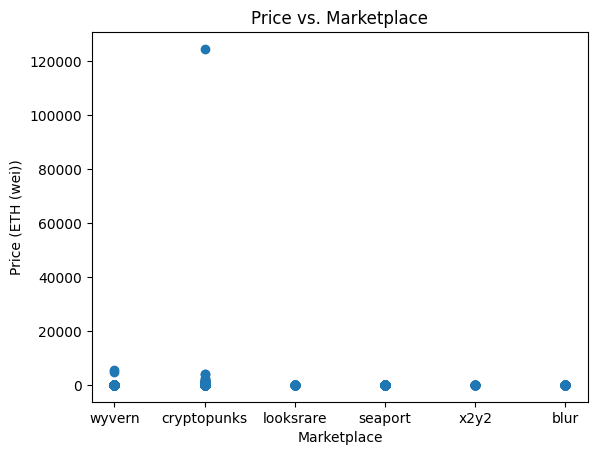

In [15]:
plt.scatter(nft_data['marketplace'], nft_data['price'])
plt.xlabel('Marketplace')
plt.ylabel('Price (ETH (wei))')
plt.title('Price vs. Marketplace')

plt.show()

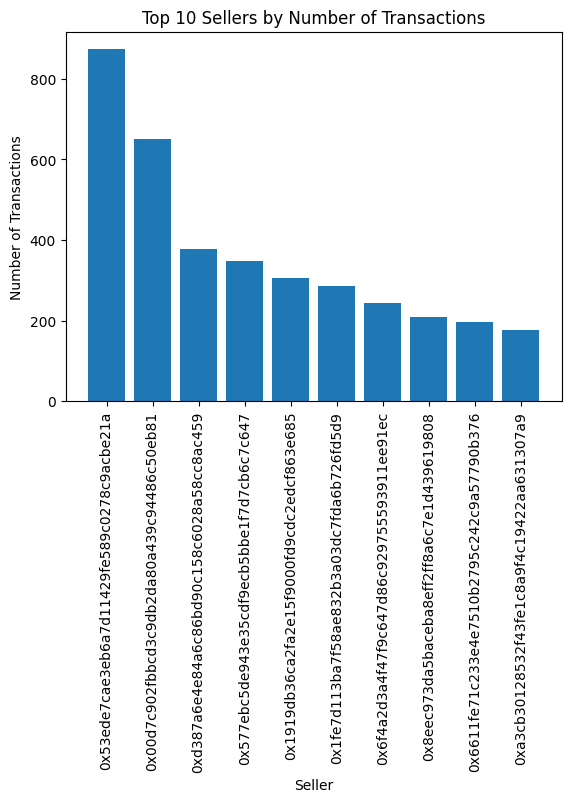

In [16]:
seller_counts = nft_data['seller'].value_counts()
top_sellers = seller_counts[:10] # select top 10 sellers
plt.bar(top_sellers.index, top_sellers.values)
plt.xlabel('Seller')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Sellers by Number of Transactions')
plt.xticks(rotation=90)
plt.show()

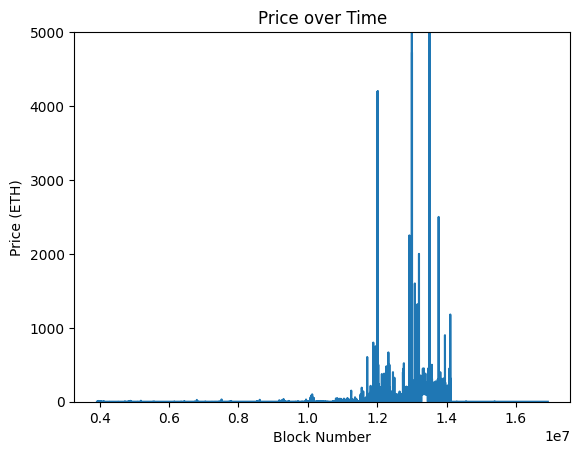

In [14]:
price_time = nft_data[['price', 'block_number']].sort_values('block_number')
plt.plot(price_time['block_number'], price_time['price'])
plt.xlabel('Block Number')
plt.ylabel('Price (ETH)')
plt.title('Price over Time')
plt.ylim([0,5000])
plt.show()

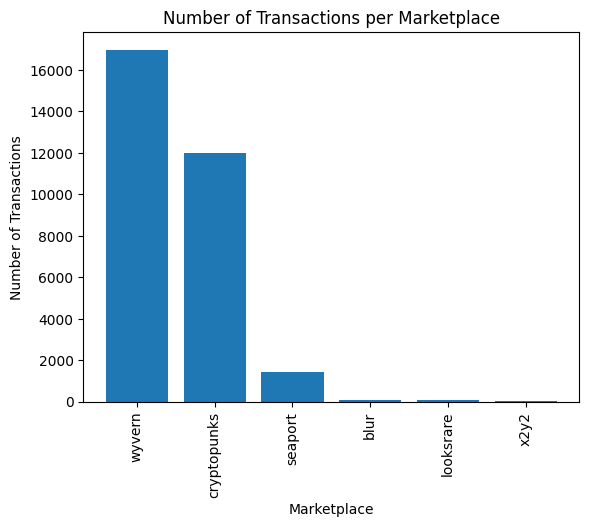

In [ ]:
marketplace_counts = nft_data['marketplace'].value_counts()
plt.bar(marketplace_counts.index, marketplace_counts.values)
plt.xlabel('Marketplace')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Marketplace')
plt.xticks(rotation=90)
plt.show()

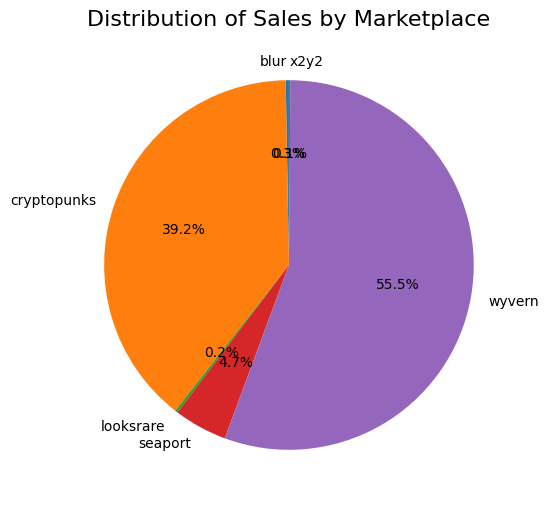

In [ ]:
# Create a pivot table to aggregate sales by marketplace
sales_by_marketplace = nft_data.pivot_table(index='marketplace', values='price', aggfunc='count')

# Create a pie chart to show the distribution of sales by marketplace
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(sales_by_marketplace['price'], labels=sales_by_marketplace.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Sales by Marketplace', fontsize=16)

# Display the plot
plt.show()


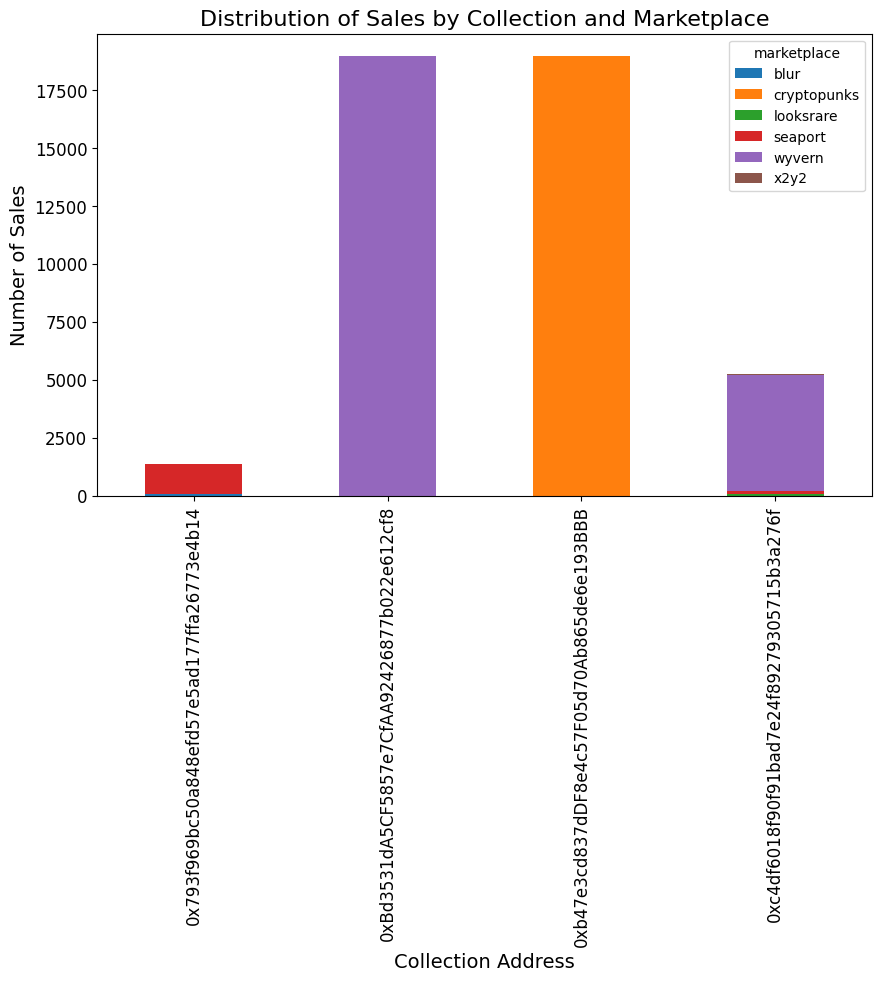

In [8]:
# Create a pivot table to aggregate sales by collection address and marketplace
sales_by_collection = nft_data.pivot_table(index='collection_address', columns='marketplace', values='price', aggfunc='count')

# Create a stacked bar chart to show the distribution of sales by collection and marketplace
fig, ax = plt.subplots(figsize=(10,6))
sales_by_collection.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Sales by Collection and Marketplace', fontsize=16)
ax.set_xlabel('Collection Address', fontsize=14)
ax.set_ylabel('Number of Sales', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Display the plot
plt.show()
